### TODO: How many strats activated from how many agents each time step
- Are strats working properly?
- Is mutating/feedbacking strats okay?

In [34]:
import pandas as pd
import numpy as np
from strategy import *
from nutil import *
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# %load_ext autoreload
# %autoreload 2

In [35]:
m = Market(150)

In [41]:
150*60*0.02*3

540.0

In [42]:
m.simulate_k_steps(3)

In [43]:
pd.DataFrame(m.mutate_history)

,time,strat,agent
0,0.000000,69b34917-07fe-4e08-9205-31506b8059e9,d2438112-6e65-4bdf-84e7-0a068229d65a
1,0.000000,e36ab371-9690-4082-a631-5b7cb9ebce6d,8f808cbe-cd7e-4afa-aba5-d7bb0c198b7d
2,0.000000,2d459606-d9d2-4635-bb1e-58d1b0bf4fcb,88855cb1-a6fe-47fa-8d5b-5abd2189c26f
3,0.000000,0a72b521-5842-49ac-bf4d-1a01d3121b44,623541a9-63b7-436b-9c5e-9ba1351dd15f
4,0.000000,115bf7ff-7e63-423a-9074-ced0cca0b7a7,623541a9-63b7-436b-9c5e-9ba1351dd15f
...,...,...,...
1112,0.000005,e1c01199-b84c-4981-b6ee-8eef86fba076,75cb1ece-1c90-4465-9d6c-1409ccfbc209
1113,0.000005,152d0c34-1548-4d25-a82c-418f6fb7ef24,75cb1ece-1c90-4465-9d6c-1409ccfbc209
1114,0.000005,a94a2ed7-8d86-488a-8e5c-241398152516,75cb1ece-1c90-4465-9d6c-1409ccfbc209
1115,0.000005,1092ad48-b000-408c-94f1-6046d2c3ab14,75cb1ece-1c90-4465-9d6c-1409ccfbc209


plt.plot(m.volume_history)
plt.plot(np.sum(np.diff(m.market_state_history,axis=0),axis=1),label='market state diff')

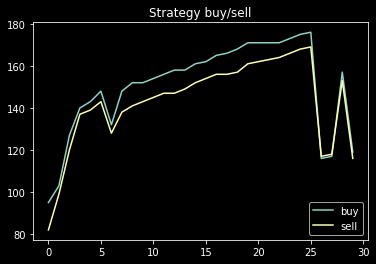

In [47]:
get_activated_no = lambda k, act: len(lfilter(
    lambda st: st.action == act and st.is_activated(m.market_state_history[k]), 
    np.squeeze(np.reshape(lmap(lambda d: d['strats'], m.action_history[k]), (1,-1)))
))

buysellstrats = np.transpose([(get_activated_no(k,1),get_activated_no(k,-1)) for k in range(len(m.action_history))])
buy = buysellstrats[0]
sell = buysellstrats[1]

plt.title("Strategy buy/sell")
plt.plot(buy, label = 'buy')
plt.plot(sell, label = 'sell')
plt.legend(loc="lower right");

In [49]:
get_action_no = lambda k, act: len(lfilter(
    lambda st: st.action == act and st.is_activated(m.market_state_history[k]), 
    np.squeeze(np.reshape(lmap(lambda d: d['action']['type'], m.action_history[k]), (1,-1)))
))

In [50]:
m.action_history

AttributeError: 'numpy.int64' object has no attribute 'action'

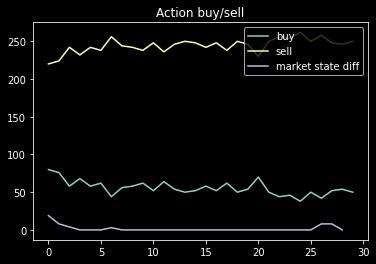

In [44]:
df = pd.DataFrame(lmap(get_bought_sold_ts, m.action_history))

df.columns = ['buy','sell','ts']

plt.title("Action buy/sell")
plt.plot(df.buy,label='buy')
plt.plot(df.sell,label='sell')
plt.plot(np.sum(np.diff(m.market_state_history,axis=0),axis=1),label='market state diff')
plt.legend(loc="upper right");

In [45]:
# List changed signals
np.unique(np.argwhere(np.diff(m.market_state_history,axis=0))[:,1]), \
lmap(
    lambda d: d['description'],
    np.array(m.signals)[
        np.unique(np.argwhere(np.diff(m.market_state_history,axis=0))[:,1])
    ]
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 18, 19, 23, 24, 28, 29, 33, 35,
        37, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58]),
 ['Price is over 0.2 times fundamental value',
  'Price is over 0.8 times fundamental value',
  'Price is over 1.4 times fundamental value',
  'Price is over 2.0 times fundamental value',
  'Price is over 2.5 times fundamental value',
  'Price is over 3.1 times fundamental value',
  'Price is over 3.7 times fundamental value',
  'Price is over 4.2 times fundamental value',
  'Price is over 0.8 times last 5 timestep avg',
  'Price is over 0.5 times last 9 timestep avg',
  'Price is over 0.8 times last 9 timestep avg',
  'Price is over 0.5 times last 13 timestep avg',
  'Price is over 0.8 times last 13 timestep avg',
  'Price is over 0.5 times last 17 timestep avg',
  'Price is over 0.8 times last 17 timestep avg',
  'Stdev is more than 0.0 over last 5 timesteps',
  'Stdev is more than 0.0 over last 11 timesteps',
  'Stdev is more than 

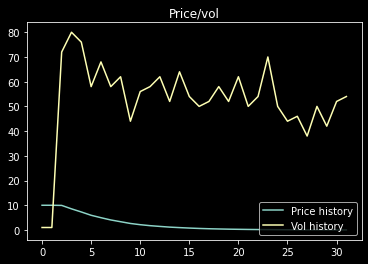

In [46]:
plt.title("Price/vol")
plt.plot(m.price_history, label = 'Price history')
plt.plot(m.volume_history, label = 'Vol history')
plt.legend(loc="lower right");

## Finding strategies that have changed

Average strength of strat should increase in time? Confident experts in some conditions?

In [14]:
str(m.action_history[0][0]['strats'][0])

'---\nAction : -1,Market indicators: [ 1  3  4  5  6  9 15 20 23 29 34 39 42 43 44 46 47 48 52 53 54],\nCondition: [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]\n---'

In [19]:
nfilter = lambda f, l: next(filter(f, l))

In [30]:
def is_diff(i : int, ag_uid: str):
    ag = nfilter(lambda d: d['name'] == ag_uid, m.action_history[i])
    ag2 = nfilter(lambda d: d['name'] == ag_uid, m.action_history[i+1])
    return ''.join(lmap(str,ag['strats'])) == ''.join(lmap(str,ag2['strats']))

In [34]:
for uid in lmap(lambda d: d['name'], m.action_history[0]):
    for i in range(29):
        if is_diff(i, uid):
            print(i)